## Travail pratique - 2 - IFT 3700
Travail présenté à Philippe Brouillard Arnaud L'Heureux

Travail fait par BOUNOUAR Zakaria - 20026947 EID Alain - 20061065 STEENHAUT Sami - 20061630 VOICULESCU Eduard - 20078235

In [9]:
#!/usr/bin/env python
%matplotlib inline

import matplotlib.pyplot as plt  # run python3 -m pip install -U matplotlib
import numpy as np

# load PATCH_test.amat in data_test
with open('PATCH_test.amat') as f:
    lines = f.readlines()

print(len(lines[0]))
x_train = np.ndarray(shape=(50000, 785), dtype=int)

for i, line in enumerate(lines):
    line = line.split(" ")
    if i == 5:
        break
    k = 0
    for j in range(len(line)):
        # convertir en 0 ou 1
        if line[j] == '0.000000000000000000e+00':
            x_train[i][k] = 0
        elif line[j] == '1.000000000000000000e+00':
            x_train[i][k] = 1
        k += 1


19600


In [10]:
print(x_train.shape)
print(x_train[0])

(50000, 785)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1

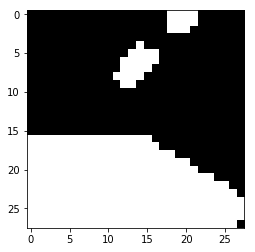

In [13]:
# Conversion de notre vecteur d'une dimension en 2 dimensions
matrix = np.reshape(x_train[0][:-1], (28,28))

plt.imshow(matrix, cmap='gray')
plt.show()